# Bayesian Inference and Parameter Estimation

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sns.set()

## Learning Objectives of Part 2-a

1. Understand what priors, likelihoods and posteriors are;
2. Use random sampling for parameter estimation to appreciate the relationship between sample size & the posterior distribution, along with the effect of the prior.

## From Bayes' Theorem to Bayesian Inference

Let's say that we flip a biased coin several times and we want to estimate the probability of heads from the number of heads we saw. Statistical intuition tells us that our best estimate of $p(heads)=$ number of heads divided by total number of flips.

However, 

1. It doesn't tell us how certain we can be of that estimate and
2. This type of intuition doesn't extend to even slightly more complex examples.

Bayesian inference helps us here. We can calculate the probability of a particular $p=p(H)$ given data $D$ by setting $A$ in Bayes Theorem equal to $p$ and $B$ equal to $D$.


$$P(p|D) = \frac{P(D|p)P(p)}{P(D)} $$



In this equation, we call $P(p)$ the prior (distribution), $P(D|p)$ the likelihood and $P(p|D)$ the posterior (distribution). The intuition behind the nomenclature is as follows: the prior is the distribution containing our knowledge about $p$ prior to the introduction of the data $D$ & the posterior is the distribution containing our knowledge about $p$ after considering the data $D$.

**Note** that we're _overloading_ the term _probability_ here. In fact, we have 3 distinct usages of the word:
- The probability $p$ of seeing a head when flipping a coin;
- The resulting binomial probability distribution $P(D|p)$ of seeing the data $D$, given $p$;
- The prior & posterior probability distributions of $p$, encoding our _uncertainty_ about the value of $p$.

**Key concept:** We only need to know the posterior distribution $P(p|D)$ up to multiplication by a constant at the moment: this is because we really only care about the values of $P(p|D)$ relative to each other – for example, what is the most likely value of $p$? To answer such questions, we only need to know what $P(p|D)$ is proportional to, as a function of $p$. Thus we don’t currently need to worry about the term $P(D)$. In fact,

$$P(p|D) \propto P(D|p)P(p) $$

**Note:** What is the prior? Really, what do we know about $p$ before we see any data? Well, as it is a probability, we know that $0\leq p \leq1$. If we haven’t flipped any coins yet, we don’t know much else: so it seems logical that all values of $p$ within this interval are equally likely, i.e., $P(p)=1$, for $0\leq p \leq1$. This is known as an uninformative prior because it contains little information (there are other uninformative priors we may use in this situation, such as the Jeffreys prior, to be discussed later). People who like to hate on Bayesian inference tend to claim that the need to choose a prior makes Bayesian methods somewhat arbitrary, but as we’ll now see, if you have enough data, the likelihood dominates over the prior and the latter doesn’t matter so much.


**Essential remark:** we get the whole distribution of $P(p|D)$, not merely a point estimate plus errors bars, such as [95% confidence intervals](http://andrewgelman.com/2018/07/04/4th-july-lets-declare-independence-95/).


## Bayesian parameter estimation I: flip those coins

Now let's generate some coin flips and try to estimate $p(H)$. Two notes:
- given data $D$ consisting of $n$ coin tosses & $k$ heads, the likelihood function is given by $L:=P(D|p) \propto p^k(1-p)^{n-k}$;
- given a uniform prior, the posterior is proportional to the likelihood.

In [2]:
def plot_posterior(p=0.6, N=0):
    """Plot the posterior given a uniform prior; Bernoulli trials
    with probability p; sample size N"""
    # Set seed
    np.random.seed(42)

    # Flip coins 
    n_successes = np.random.binomial(N, p)
    
    # X-axis for PDF
    x = np.linspace(0, 1, 100)
    
    # Write out equation for uniform prior
    prior = 1
    
    # Write out equation for posterior, which is likelihood * prior.
    posterior = (x**n_successes) * ((1-x)**(N-n_successes)) * prior
    
    # Pseudo-normalize the posterior so that we can compare them on the same scale.
    posterior /= np.max(posterior)  
    
    # Plot posterior
    plt.plot(x, posterior)
    plt.show()

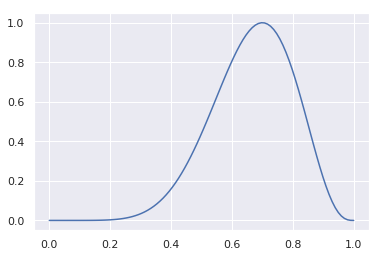

In [3]:
plot_posterior(N=10)

* Now use the great ipywidget interact to check out the posterior as you generate more and more data (you can also vary $p$):

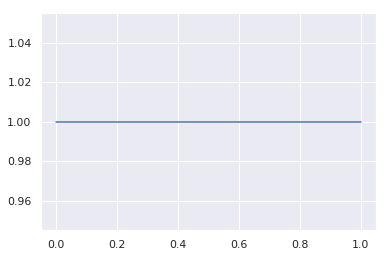

In [4]:
interact(plot_posterior, p=(0, 1, 0.01), N=(0, 1500));

**Notes for discussion:**

* as you generate more and more data, your posterior gets narrower, i.e. you get more and more certain of your estimate.
* you need more data to be certain of your estimate when $p=0.5$, as opposed to when $p=0$ or $p=1$. 

### The choice of the prior

You may have noticed that we needed to choose a prior and that, in the small to medium data limit, this choice can affect the posterior. We'll briefly introduce several types of priors and then you'll use one of them for the example above to see the effect of the prior:

- **Informative priors** express specific, definite information about a variable, for example, if we got a coin from the mint, we may use an informative prior with a peak at $p=0.5$ and small variance. 
- **Weakly informative priors** express partial information about a variable, such as a peak at $p=0.5$ (if we have no reason to believe the coin is biased), with a larger variance.
- **Uninformative priors** express no information about a variable, except what we know for sure, such as knowing that $0\leq p \leq1$.

Now you may think that the _uniform distribution_ is uninformative, however, what if I am thinking about this question in terms of the probability $p$ and Eric Ma is thinking about it in terms of the _odds ratio_ $r=\frac{p}{1-p}$? Eric rightly feels that he has no prior knowledge as to what this $r$ is and thus chooses the uniform prior on $r$.

With a bit of algebra (transformation of variables), we can show that choosing the uniform prior on $p$ amounts to choosing a decidedly non-uniform prior on $r$ and vice versa. So Eric and I have actually chosen different priors, using the same philosophy. How do we avoid this happening? Enter the **Jeffreys prior**, which is an uninformative prior that solves this problem. You can read more about the Jeffreys prior [here](https://en.wikipedia.org/wiki/Jeffreys_prior) & in your favourite Bayesian text book (Sivia gives a nice treatment). 

In the binomial (coin flip) case, the Jeffreys prior is given by $P(p) = \frac{1}{\sqrt{p(1-p)}}$.



### Hands-on

* Create an interactive plot like the one above, except that it has two posteriors on it: one for the uniform prior, another for the Jeffries prior.

In [7]:
# Write the plotting function, as above
def plot_posteriors(p=0.6, N=0):
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    x = np.linspace(0.01, 0.99, 100)

    # Write out the likelihood for the data
    likelihood = x**n_successes*(1-x)**(N-n_successes) 
    
    # Write out equation for posterior given uniform prior
    prior_uniform = 1 
    posterior_uniform = likelihood * prior_uniform
    posterior_uniform /= np.max(posterior_uniform)
    plt.plot(x, posterior_uniform, label='Uniform prior')
    
    # Write out equation for posterior given Jeffreys prior
    prior_jeffreys = np.sqrt(x*(1-x))**(-1)
    posterior_jeffreys = likelihood * prior_jeffreys
    posterior_jeffreys /= np.max(posterior_jeffreys)
    plt.plot(x, posterior_jeffreys, label='Jeffreys prior')
    plt.legend()
    plt.show()

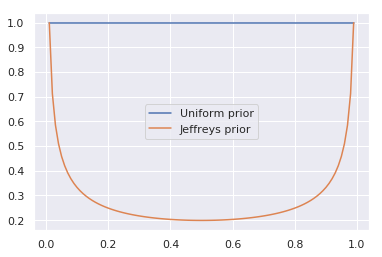

In [8]:
interact(plot_posteriors, p=(0, 1, 0.01), N=(0, 100));